In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# Any results you write to the current directory are saved as output.

In [2]:
import os
from PIL import Image
# input image dimensions
img_rows, img_cols = 200, 200


In [12]:
immatrix = []
imlabel = []
dir = "/home/prateek/Downloads/notebooks,centosAndData/forKeras/500/traintest550/l"
for i in range(0, 5):
    count = 0
    currDir = dir + str(i) + '/'
    listing = os.listdir(currDir)
    print "Reading dir : " + currDir
    np.size(listing)
    for file in listing:
        imlabel.append(i)
        im = Image.open(currDir + file)   
        img = im.resize((img_rows,img_cols))
        gray = img.convert('L')
        immatrix.append(np.array(gray).flatten())
        count = count + 1
    print count
        
print "Done"

Reading dir : /home/prateek/Downloads/notebooks,centosAndData/forKeras/500/traintest550/l0/
110
Reading dir : /home/prateek/Downloads/notebooks,centosAndData/forKeras/500/traintest550/l1/
110
Reading dir : /home/prateek/Downloads/notebooks,centosAndData/forKeras/500/traintest550/l2/
110
Reading dir : /home/prateek/Downloads/notebooks,centosAndData/forKeras/500/traintest550/l3/
110
Reading dir : /home/prateek/Downloads/notebooks,centosAndData/forKeras/500/traintest550/l4/
110
Done


In [13]:
print len(immatrix)
print len(imlabel)

#imlabel.head()

550
550


In [14]:
from sklearn.utils import shuffle

data,Label = shuffle(immatrix,imlabel, random_state=2)
train_data = [data,Label]
type(train_data)

list

200


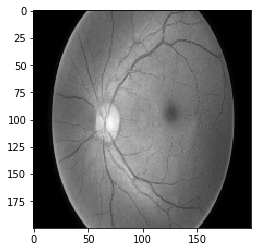

In [15]:
import matplotlib.pyplot as plt
import matplotlib

img=immatrix[167].reshape(img_rows,img_cols)
print str(len(img))
plt.imshow(img)
plt.imshow(img,cmap='gray')

In [16]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 5

In [17]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [18]:
(X, y) = (train_data[0],train_data[1])
from sklearn.cross_validation import train_test_split

# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)

#X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(440, 40000)
(110, 40000)
('X_train shape:', (440, 200, 200, 1))
(440, 'train samples')
(110, 'test samples')


('label : ', array([1., 0., 0., 0., 0.]))


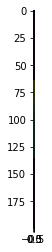

In [19]:
from keras.utils import np_utils

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 100
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

In [27]:
'''
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')#KERAS
'''

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

/home/prateek/.local/lib/python2.7/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(200, 200,...)`
/home/prateek/.local/lib/python2.7/site-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`


ValueError: Unknown metric function:precision_score

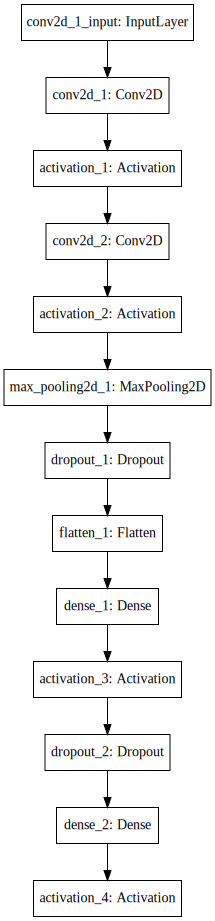

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [22]:
from pydot import Graph
import graphviz
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [23]:
from keras.preprocessing.image import ImageDataGenerator

# create generators  - training data will be augmented images
validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

batchsize=8
train_generator=traindatagenerator.flow(X_train, Y_train, batch_size=batchsize) 
validation_generator=validationdatagenerator.flow(X_test, Y_test,batch_size=batchsize)

In [24]:
#hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
model.fit_generator(train_generator, steps_per_epoch=int(len(X_train)/batchsize), epochs=3, validation_data=validation_generator, validation_steps=int(len(X_test)/batchsize))

#hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
#              show_accuracy=True, verbose=1, validation_split=0.2)

Epoch 1/3
55/55 [==============================] - 243s 4s/step - loss: 1.8229 - acc: 0.1955 - val_loss: 1.6105 - val_acc: 0.2212
Epoch 2/3
55/55 [==============================] - 210s 4s/step - loss: 1.6110 - acc: 0.2023 - val_loss: 1.6133 - val_acc: 0.1827
Epoch 3/3
55/55 [==============================] - 210s 4s/step - loss: 1.6092 - acc: 0.2114 - val_loss: 1.6174 - val_acc: 0.1923


In [25]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

print("%s: %.2f%%" % (model.metrics_names[1], score[1] * 100))
#cvscores.append(scores[1] * 100)
#print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

[1.615658281066201, 0.20000000108372082]
acc: 20.00%
